## Load the data

In [1]:
import pandas as pd
data = pd.read_csv('Cars93.csv') 
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [2]:
data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Any missing data?

In [3]:
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

## Replacing the missing values by the mean of the column
#### There is missing data in  Rear.seat.room  and in Luggage.room columns
#### Dataframes have .mean() functions that excludes NaN values. Each column in a dataFrame is a Series that has also a .mean() function that do the same thing.

In [4]:
data = data.fillna(data.mean())
data.mean()

Unnamed: 0              47.000000
Min.Price               17.125806
Price                   19.509677
Max.Price               21.898925
MPG.city                22.365591
MPG.highway             29.086022
EngineSize               2.667742
Horsepower             143.827957
RPM                   5280.645161
Rev.per.mile          2332.204301
Fuel.tank.capacity      16.664516
Passengers               5.086022
Length                 183.204301
Wheelbase              103.946237
Width                   69.376344
Turn.circle             38.956989
Rear.seat.room          27.829670
Luggage.room            13.890244
Weight                3072.903226
dtype: float64

## Verificando que se hallan removido los nans

In [5]:
data.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

## Estandarizando con StandardScaler() class

In [6]:
data.dtypes == float 

Unnamed: 0            False
Manufacturer          False
Model                 False
Type                  False
Min.Price              True
Price                  True
Max.Price              True
MPG.city              False
MPG.highway           False
AirBags               False
DriveTrain            False
Cylinders             False
EngineSize             True
Horsepower            False
RPM                   False
Rev.per.mile          False
Man.trans.avail       False
Fuel.tank.capacity     True
Passengers            False
Length                False
Wheelbase             False
Width                 False
Turn.circle           False
Rear.seat.room         True
Luggage.room           True
Weight                False
Origin                False
Make                  False
dtype: bool

In [7]:
data.dtypes == int

Unnamed: 0             True
Manufacturer          False
Model                 False
Type                  False
Min.Price             False
Price                 False
Max.Price             False
MPG.city               True
MPG.highway            True
AirBags               False
DriveTrain            False
Cylinders             False
EngineSize            False
Horsepower             True
RPM                    True
Rev.per.mile           True
Man.trans.avail       False
Fuel.tank.capacity    False
Passengers             True
Length                 True
Wheelbase              True
Width                  True
Turn.circle            True
Rear.seat.room        False
Luggage.room          False
Weight                 True
Origin                False
Make                  False
dtype: bool

In [8]:
# escojo solo valores numericos:
# no tomo en cuenta valor minimo o maximo pq estos tienen correlacion con la variable dependiente
keys = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']

## Visualizo la variable objetivo

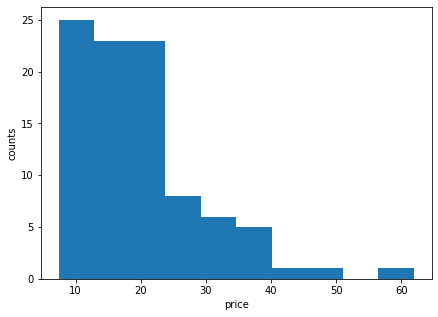

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
plt.hist(data['Price'])
plt.xlabel('price')
plt.ylabel('counts')
plt.show()

In [10]:
data['Price'].mean()

19.509677419354837

## Graficas de precio vs los features para observar la correlacion

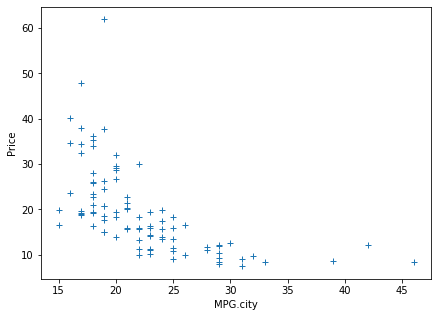

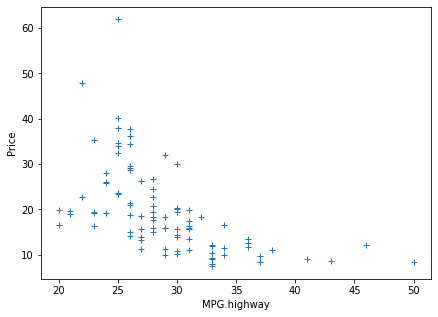

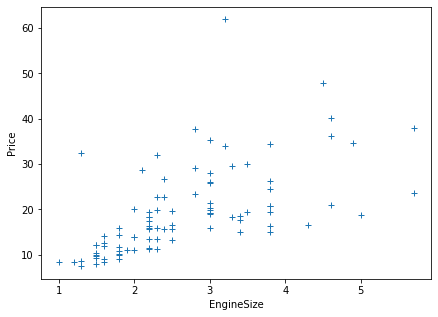

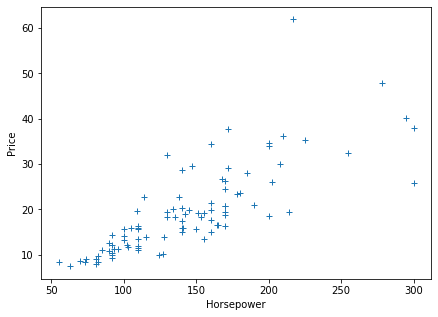

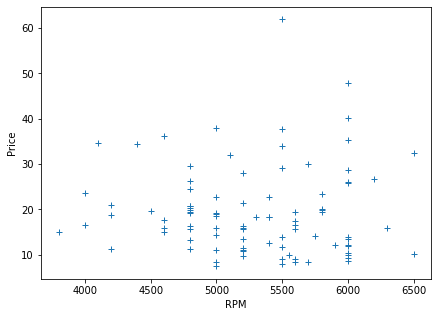

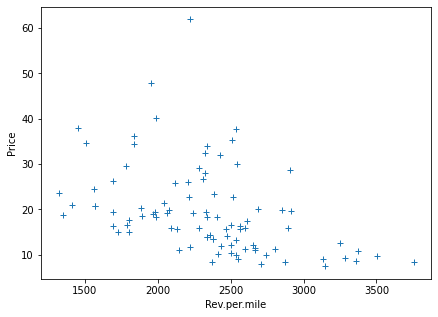

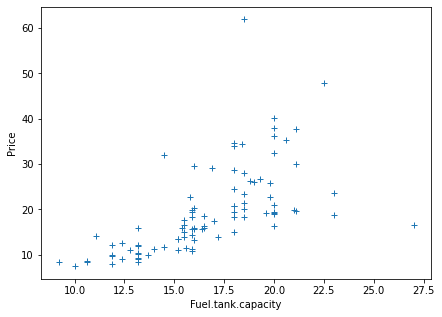

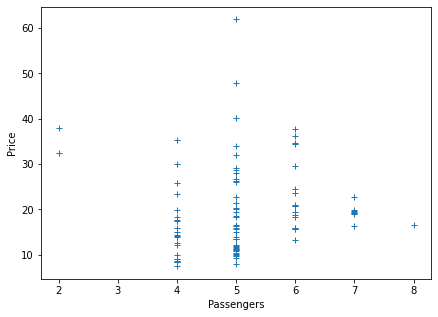

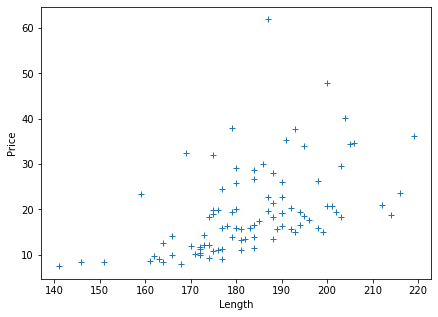

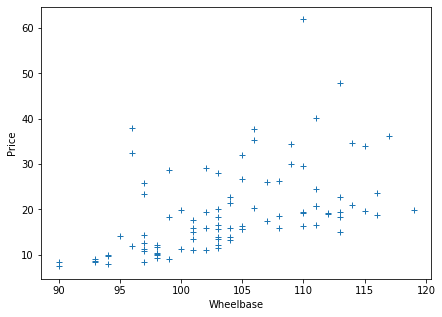

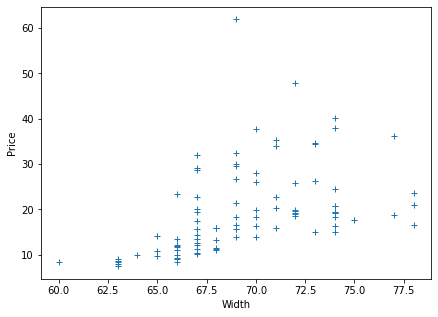

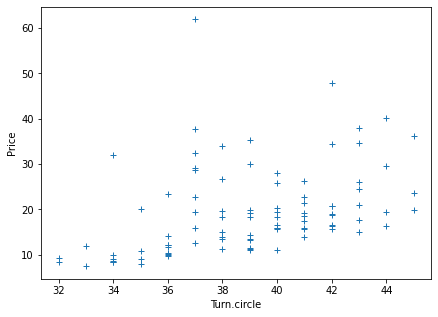

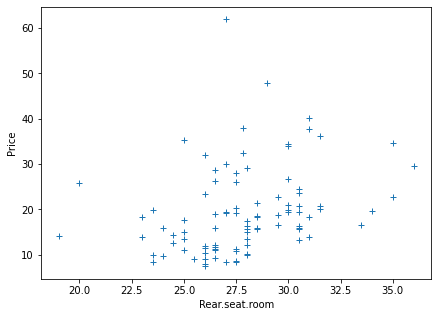

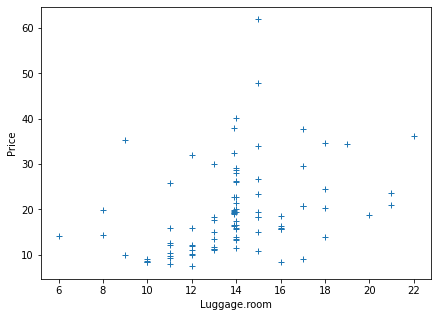

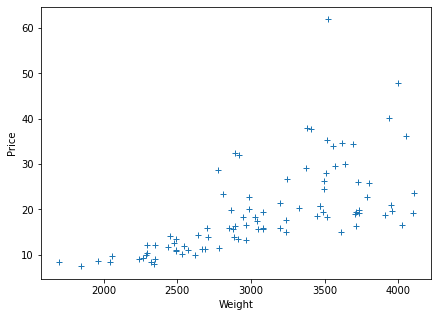

In [11]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data['Price'],'+')
  plt.xlabel(k)
  plt.ylabel('Price')
  plt.show()

## Convierto a binario los valores de Price para usar RandomForest

In [12]:
import numpy as np
Y = np.array(data['Price'], dtype=int)
np.unique(Y,return_counts=True)

Y[Y<int(data['Price'].mean())] = 0    # clase de baja calidad
Y[Y>=int(data['Price'].mean())] = 1   # clase de alta calidad

np.unique(Y, return_counts=True)

(array([0, 1]), array([52, 41]))

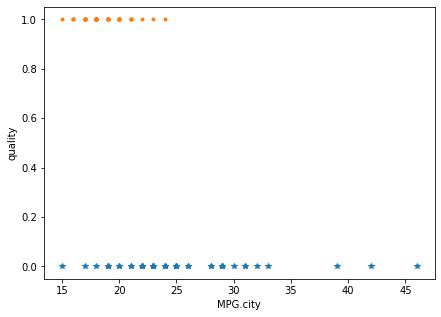

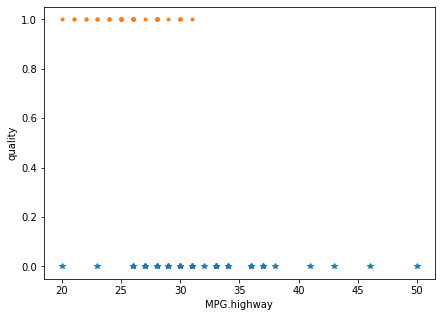

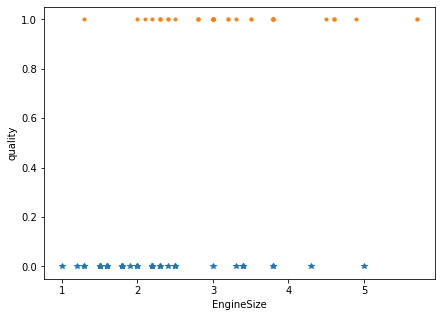

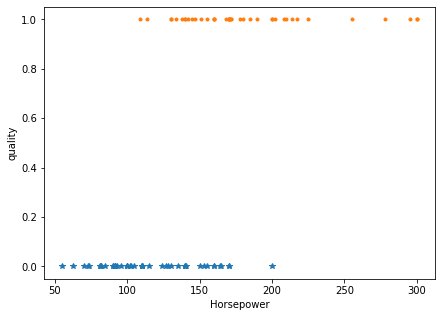

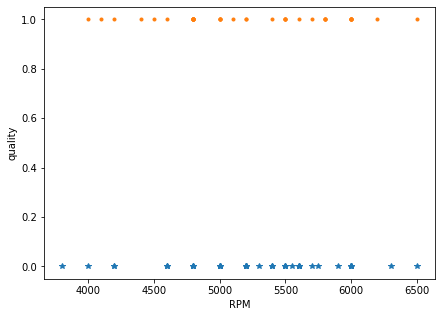

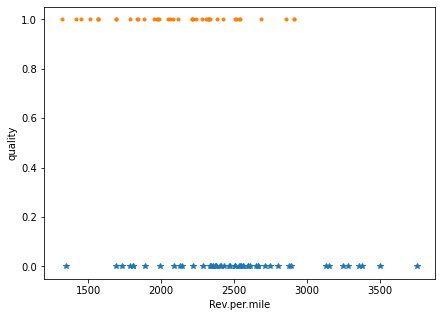

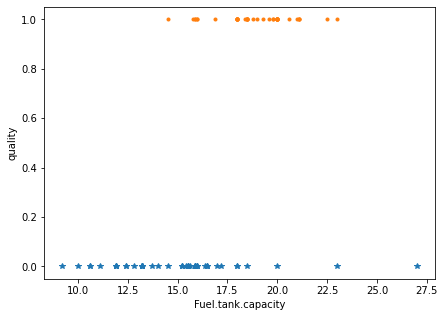

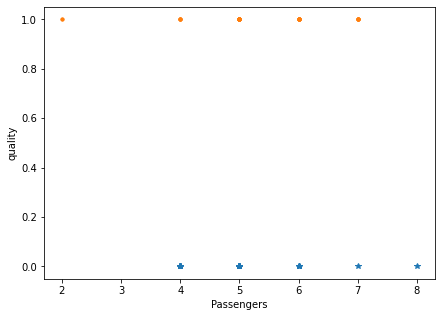

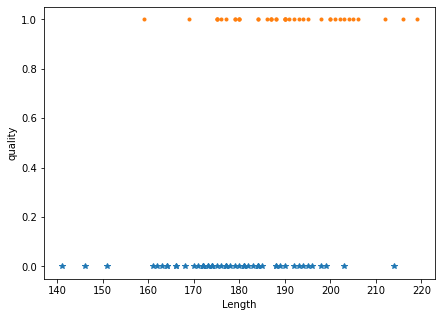

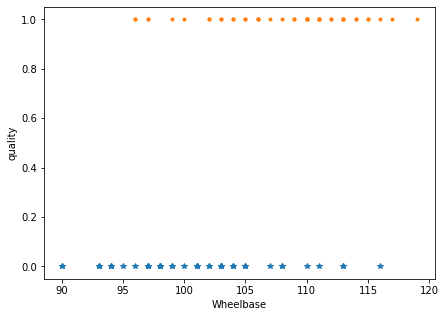

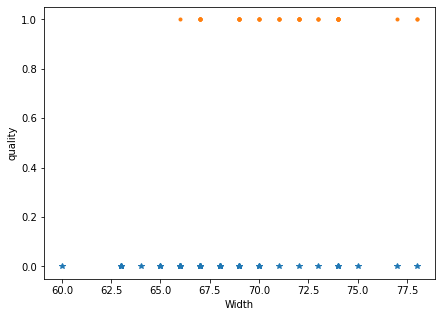

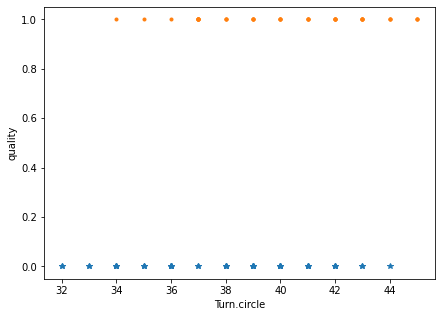

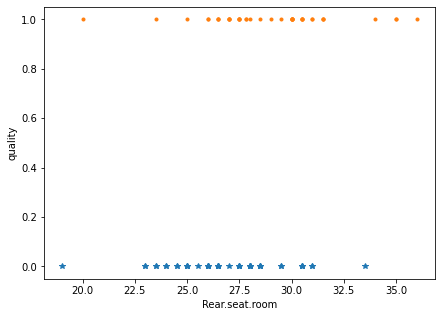

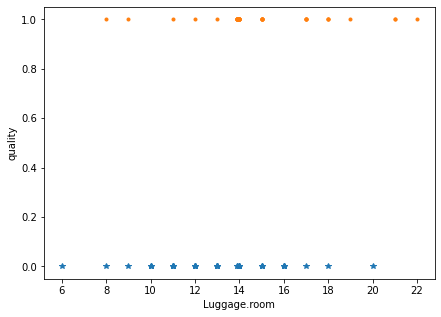

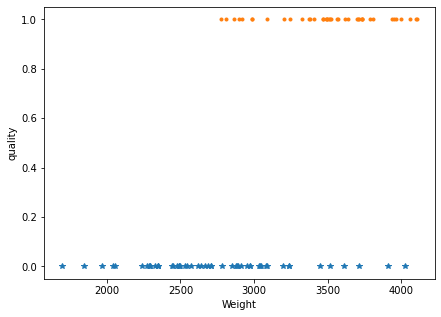

In [13]:
# Graficando Price vs features ahora con valores binarios
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel('quality')
  plt.show()

## No deben existir correlaciones entre features  y variable depenndiente. 

#### Miremos las correlaciones:

In [14]:
!pip install corner

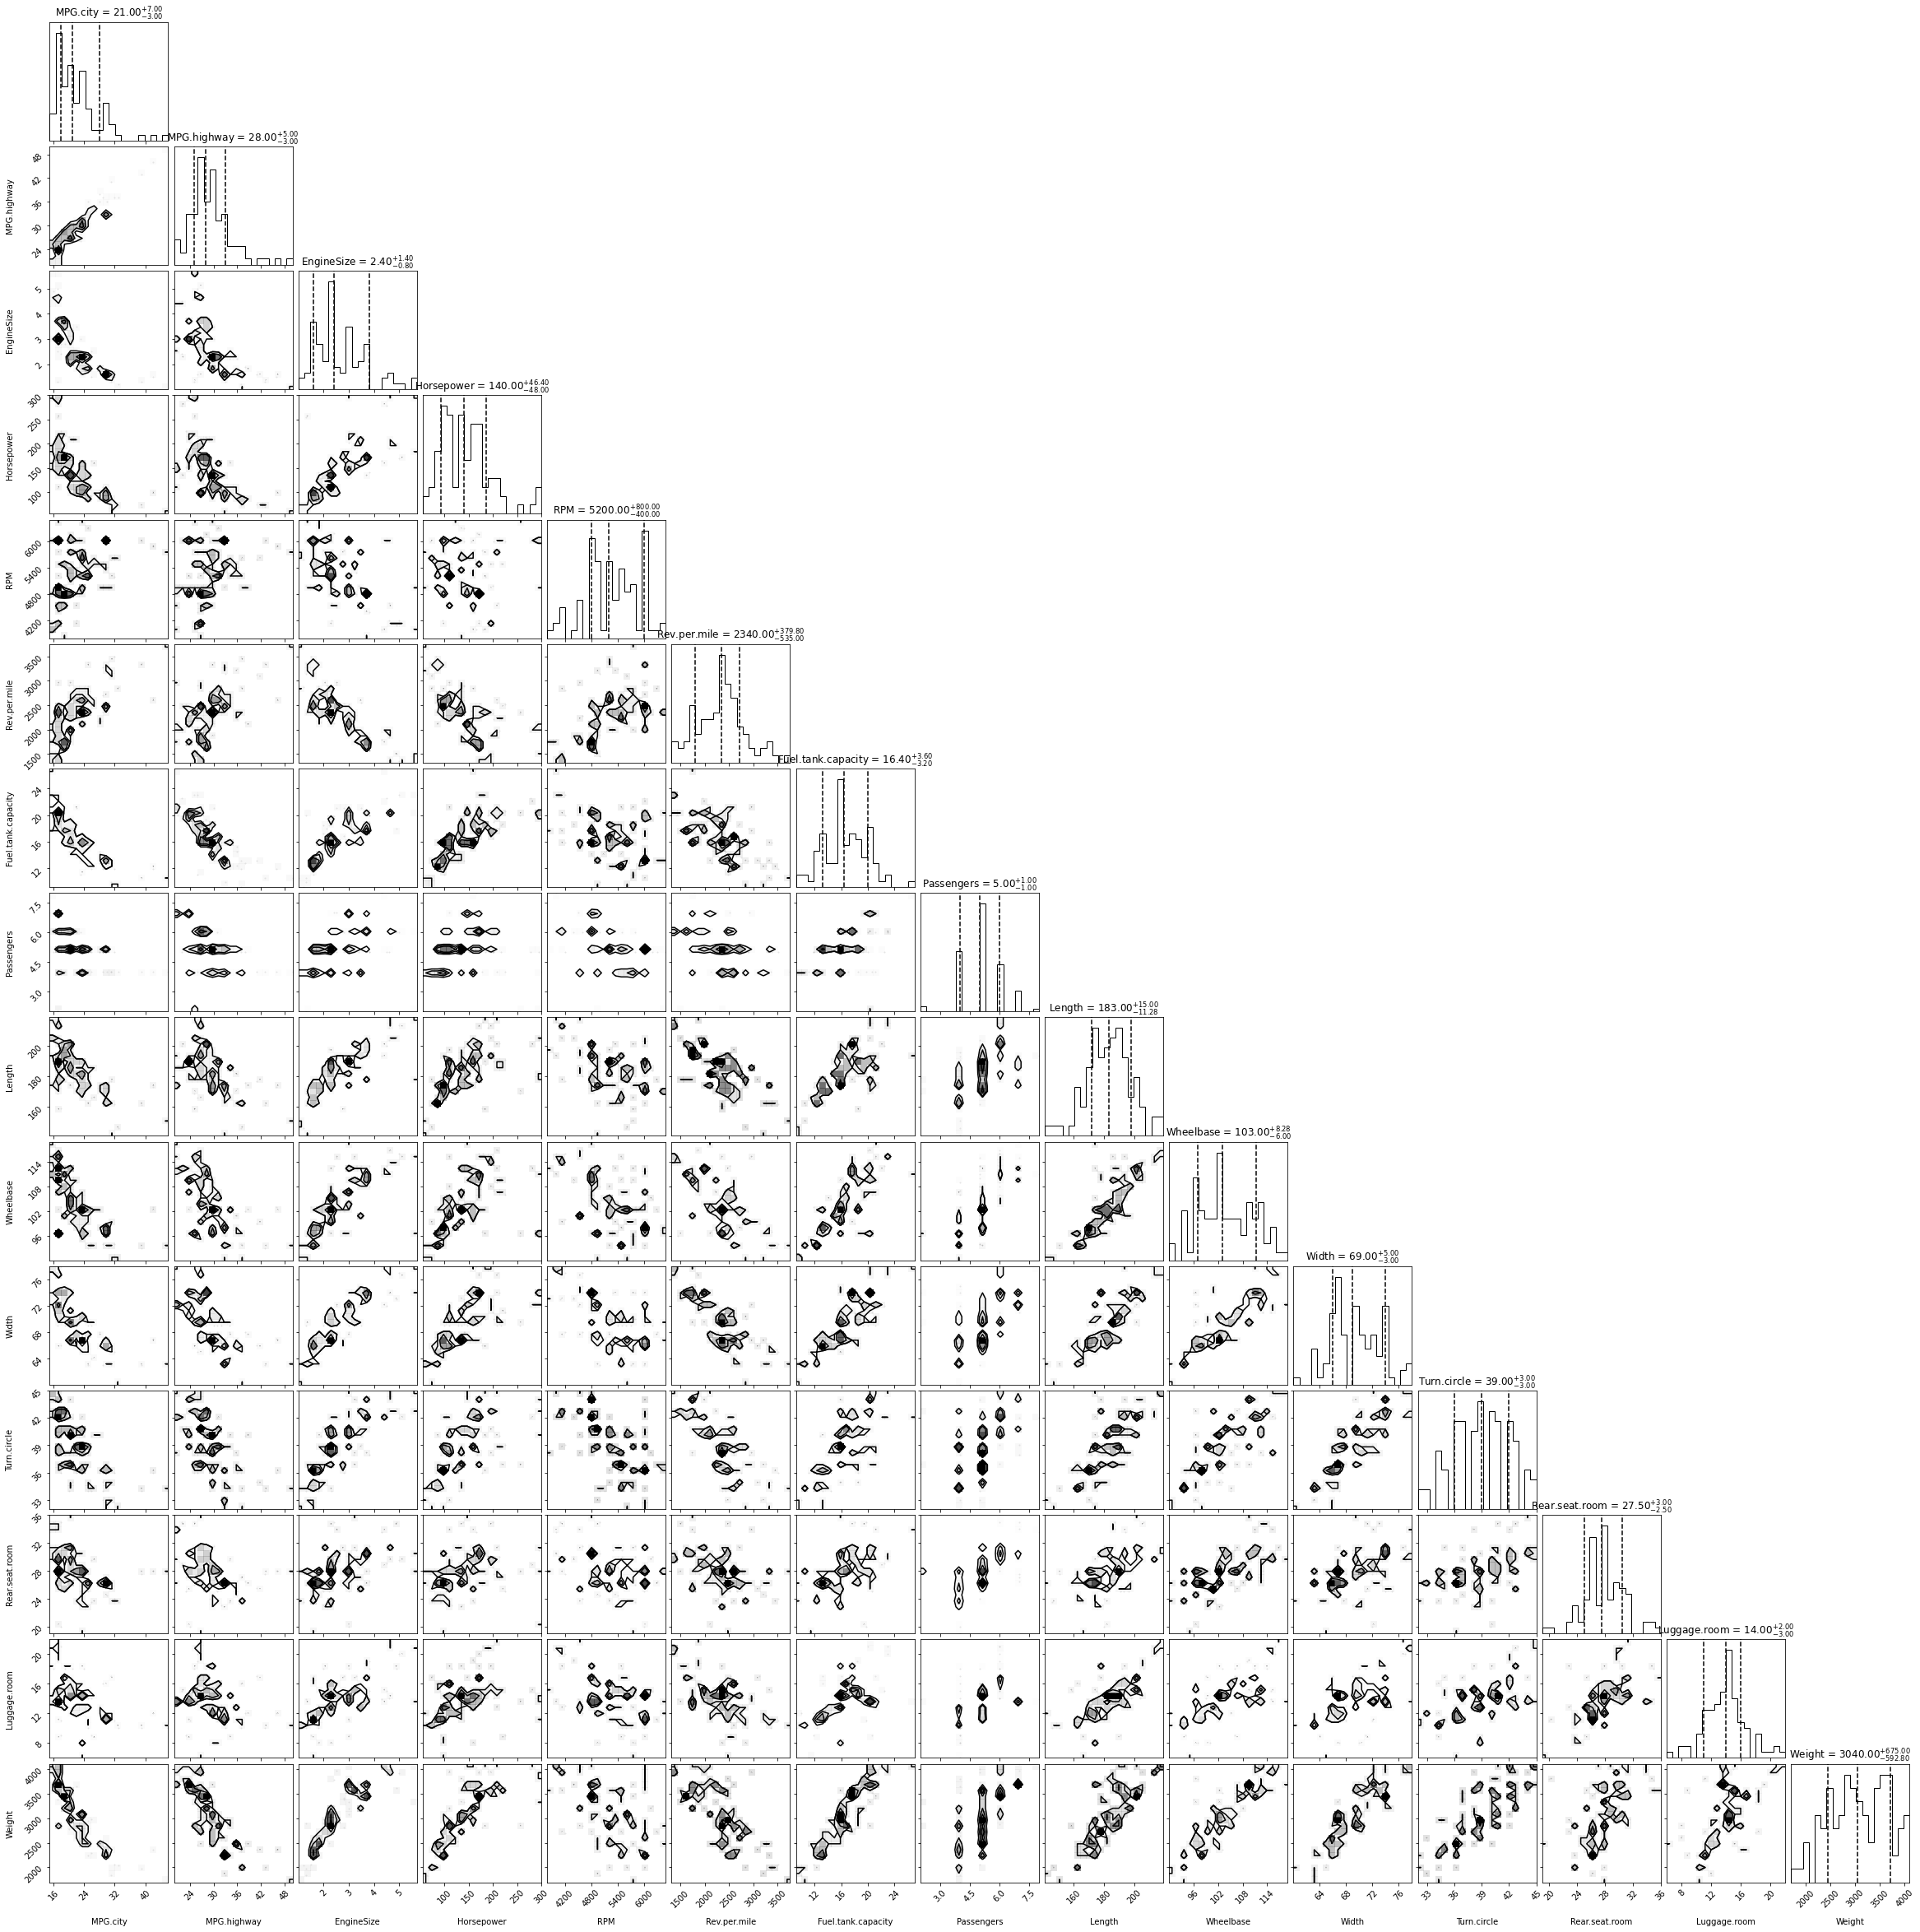

In [15]:
import corner
figure = corner.corner(data[keys], labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

Viendo las graficas de correlacion, escojo los dos features que estén menos correlacionados con la variable Price, entonces escojo el Luggage room y el Rear seat room.

## Estandarizando los datos

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[keys])

## Splitting into training and test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]), Y)

## ML RandomForestClassifier Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)   # 10 de altura y 100 arboles

## Fitting the model

In [19]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Preduciendo valores

In [20]:
Y_pred = model.predict(X_test)

## Parametro de evaluacion: accuracy

In [21]:
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.9166666666666666

##Feautures más importantes

In [23]:
importances = model.feature_importances_
ordenados = np.argsort(importances)[::-1]
np.array(keys)[ordenados]

array(['MPG.city', 'Fuel.tank.capacity', 'Weight', 'Horsepower',
       'EngineSize', 'MPG.highway', 'Length', 'Rev.per.mile', 'RPM',
       'Rear.seat.room', 'Width', 'Wheelbase', 'Turn.circle',
       'Luggage.room', 'Passengers'], dtype='<U18')

### Los 2 features mas imporantes son 'MPG.city' y 'Fuel.tank.capacity' como se puede ver arriba, pero de igual manera con los dos que escogí se realizó un buen modelo de Machine Learning, ya que se obtuvo una accuracy de 0.92